In [10]:
import CentralStreamingModel.comparisons.models as md
import pickle
import matplotlib.pyplot as plt
import numpy as np
import importlib
import seaborn as sns
import parametrization as param
import importlib
from sklearn.preprocessing import StandardScaler
sns.set_context('talk')

In [11]:
n_boxes = range(1,16)
boxsize = 2000
snapshot = 20

rs = []
for i, box in enumerate(n_boxes):
    rs.append(md.RedshiftSpace(box, 2000, 20))


In [4]:
mean_rs = md.MeanRedshiftSpace( boxsize, snapshot, rs)

Computing streaming integral
Computing streaming integral
Computing streaming integral


In [5]:
importlib.reload(md)

<module 'CentralStreamingModel.comparisons.models' from '/home/c-cuesta/CentralStreamingModel/comparisons/models.py'>

In [12]:
parameters = [r'$w_r$',r'$w_t$',r'$v_{r,c}$',r'$\alpha$',r'$\kappa$']

In [13]:
r = rs[0].measured.r


In [14]:
popt = mean_rs.skewt.popt
reduced_popt = np.zeros_like(popt)


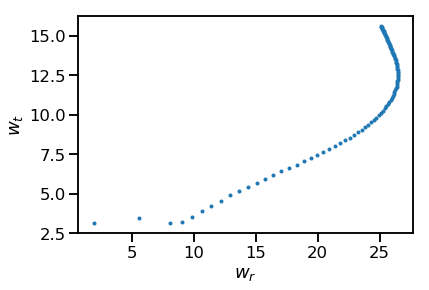

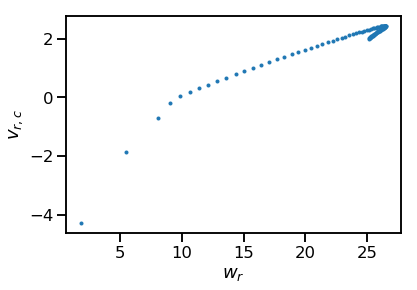

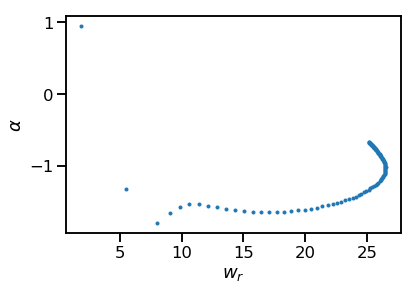

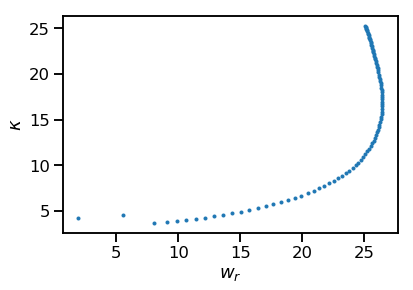

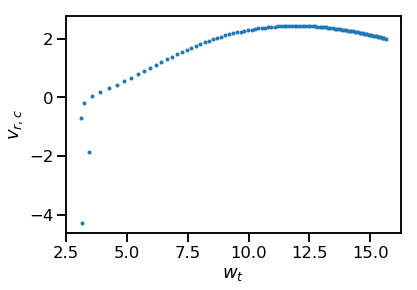

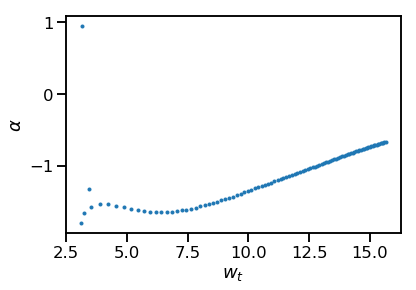

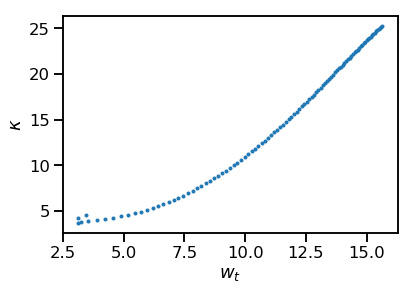

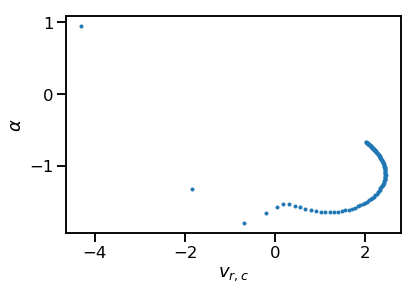

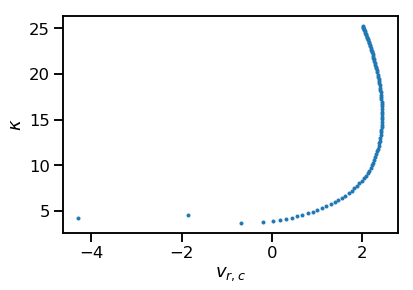

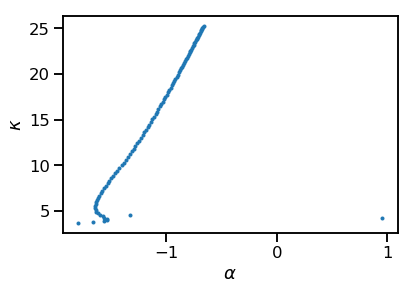

In [17]:
for i in range((popt.shape[-1])):
    for j in range(i+1, (popt.shape[-1])):
        plt.plot(popt[:,i], popt[:,j], linestyle='',
                marker = 'o', markersize=3)
        plt.xlabel(parameters[i])
        plt.ylabel(parameters[j])
        plt.show()
        

Text(0, 0.5, '$\\kappa$')

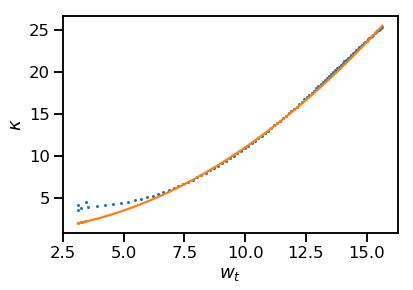

In [35]:
plt.plot(popt[:,1], popt[:,4], marker='o', markersize=2,
         linestyle='')
plt.plot(popt[:,1], popt[:,1]**2/10 + 1)
plt.xlabel('$w_t$')
plt.ylabel('$\kappa$')

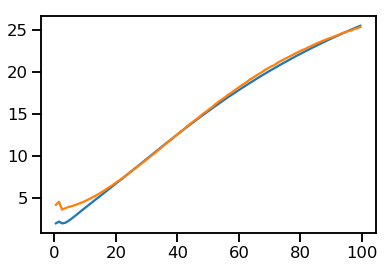

In [37]:
plt.plot(r, popt[:,1]**2/10 + 1)
plt.plot(r, popt[:,-1])

In [38]:
def fitting(r, a, b,c):
    return a * np.log(c*r)  + b

In [376]:
def fitting_wr(r, a,b, c, d):
    return a*np.arctan(b*r) +  c * r +d

2.350519382507434


Text(40, 15, '$\\chi^2_\\nu $ = 0.02')

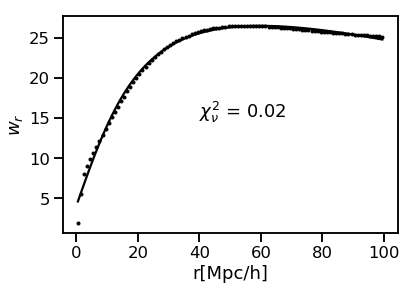

In [243]:
idx = 0

reduced_popt[:,idx], chi, popt_wr_halos = param.plot(fitting_wr, r, popt[:,idx], 
        'black', 'Halos',parameters[idx], limit = 0)
plt.text(40, 15, r'$\chi^2_\nu $ = %.2f'%chi, fontdict=dict(color='black'))


In [420]:
def fitting_vrc(r, a,b, c, d):
    return a*np.log10(b*r) +  c * r +d

0.03730678444252064


Text(40, 0.5, '$\\chi^2_\\nu $ = 0.00')

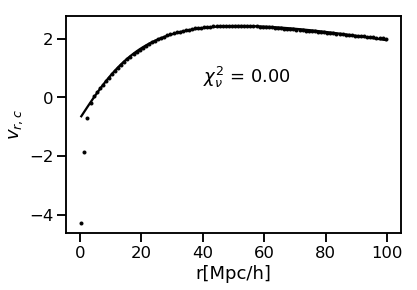

In [421]:
idx = 2

reduced_popt[:,idx], chi, popt_vrc_halos = param.plot(fitting_wr, r, popt[:,idx], 
        'black', 'Halos',parameters[idx], limit = 5)
plt.text(40, 0.5, r'$\chi^2_\nu $ = %.2f'%chi, fontdict=dict(color='black'))


In [43]:
def fitting_wt(r, a, b,c):
    return a * r**b  + c

In [44]:
def fitting_wt(r, a, b,c,d):
    return a * r**b  + c + d*r

0.004003684305465193


Text(40, 5, '$\\chi^2_\\nu $ = 0.00')

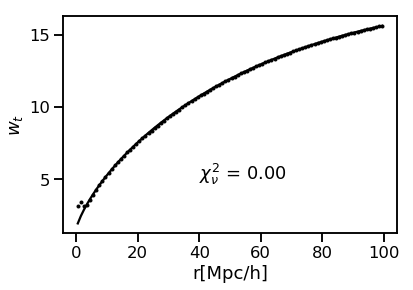

In [45]:
idx = 1

reduced_popt[:,idx], chi, popt_wt_halos = param.plot(fitting_wt, r, popt[:,idx], 
        'black', 'Halos',parameters[idx])
plt.text(40, 5, r'$\chi^2_\nu $ = %.2f'%chi, fontdict=dict(color='black'))


In [46]:
def fitting_alpha(r, a,b,c):
    return a/np.sqrt(r) + b * np.log10(r)  + c

0.04984610520893897


Text(40, -1.6, '$\\chi^2_\\nu $ = 0.00')

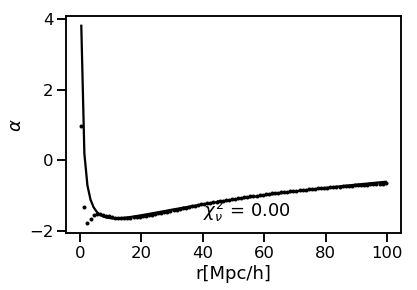

In [47]:
idx = 3

reduced_popt[:,idx], chi, popt_alpha_halos = param.plot(fitting_alpha, r, popt[:,idx], 
        'black', 'Halos',parameters[idx], limit = 5)
plt.text(40, -1.6, r'$\chi^2_\nu $ = %.2f'%chi, fontdict=dict(color='black'))


In [48]:
def fitting_kappa(r, a, b):
    return a * r  + b

2.5166411040260033


Text(40, 5, '$\\chi^2_\\nu $ = 0.03')

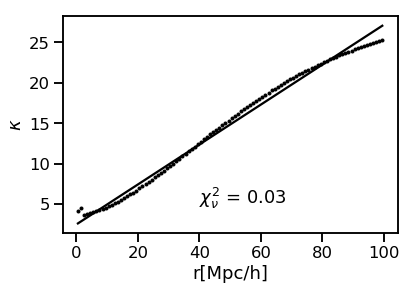

In [49]:
idx = 4

reduced_popt[:,idx], chi, popt_k_halos = param.plot(fitting_kappa, r, popt[:,idx], 
        'black', 'Halos',parameters[idx])
plt.text(40, 5, r'$\chi^2_\nu $ = %.2f'%chi, fontdict=dict(color='black'))


## Substituting all parameters

In [422]:
reduced_skewt = md.Skewt(r, 0.,0.,0., mean_rs.mean_tpcf_dict,
                         popt=reduced_popt)

Computing streaming integral


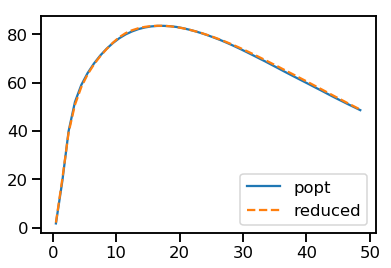

In [423]:
s_c = rs[0].measured.s_c

plt.plot(s_c, s_c*s_c*mean_rs.skewt.monopole, label = 'popt')
plt.plot(s_c, s_c*s_c*reduced_skewt.monopole, label = 'reduced',
        linestyle='dashed')
plt.legend()

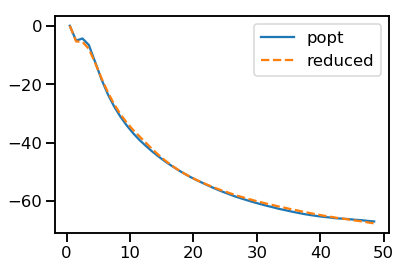

In [424]:
plt.plot(s_c, s_c*s_c*mean_rs.skewt.quadrupole, label = 'popt')
plt.plot(s_c, s_c*s_c*reduced_skewt.quadrupole, label = 'reduced',
        linestyle='dashed')
plt.legend()

## Substituting one parameter at a time

In [429]:
one_param = []
for i in range(popt.shape[-1]):
    one_popt = popt.copy()
    one_popt[:,i] = reduced_popt[:,i]
    reduced_skewt = md.Skewt(r, 0.,0.,0., mean_rs.mean_tpcf_dict,
                         popt=one_popt)
    one_param.append(reduced_skewt)  

Computing streaming integral
Computing streaming integral
Computing streaming integral
Computing streaming integral
Computing streaming integral


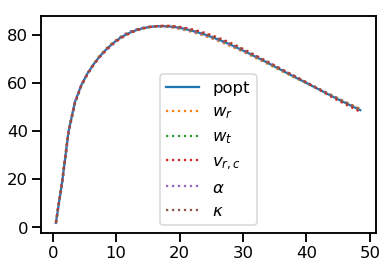

In [430]:
plt.plot(s_c, s_c*s_c*mean_rs.skewt.monopole, label = 'popt')

for i in range(popt.shape[-1]):

    plt.plot(s_c, s_c*s_c*one_param[i].monopole, 
             label = parameters[i], linestyle='dotted'
            )

plt.legend()

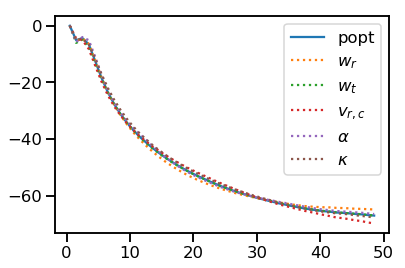

In [431]:
plt.plot(s_c, s_c*s_c*mean_rs.skewt.quadrupole, label = 'popt')

for i in range(popt.shape[-1]):

    plt.plot(s_c, s_c*s_c*one_param[i].quadrupole, 
             label = parameters[i], linestyle='dotted'
            )

plt.legend()

## Improving fit of  alpha, find what scales need to be improved

In [61]:
idx = 3
window_size = 15

rolling_test = []
for i in range(len(r)//window_size):
    rolling_test_popt = popt.copy()
    start = i * window_size
    end = (i+1)*window_size
    rolling_test_popt[start:end,idx] = reduced_popt[start:end,idx]
    reduced_skewt = md.Skewt(r, 0.,0.,0., mean_rs.mean_tpcf_dict,
                         popt=rolling_test_popt)
    rolling_test.append(reduced_skewt)  

Computing streaming integral
Computing streaming integral
Computing streaming integral
Computing streaming integral
Computing streaming integral
Computing streaming integral


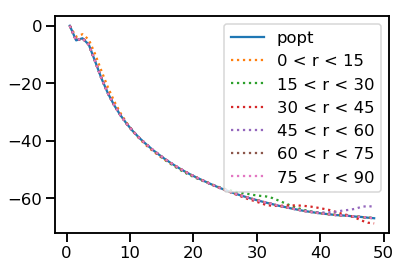

In [63]:
plt.plot(s_c, s_c*s_c*mean_rs.skewt.quadrupole, label = 'popt')

for i in range(len(rolling_test)):
    start = i *window_size
    end = (i+1) * window_size
    plt.plot(s_c, s_c*s_c*rolling_test[i].quadrupole, 
             label=f'{start} < r < {end}', linestyle='dotted'
            )

plt.legend()

In [282]:
def fitting_alpha(r, a,b,c,d):
    return a*np.arctan(b*r) +d + c/r**3 

0.003416356484063895


Text(40, -1.6, '$\\chi^2_\\nu $ = 0.02')

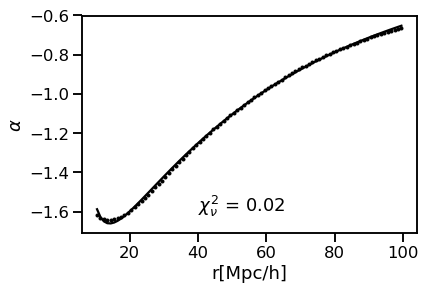

In [287]:
idx = 3

_,_, popt_alpha_halos = param.plot(fitting_alpha, r[10:], popt[10:,idx], 
        'black', 'Halos',parameters[idx], limit = 5)

plt.text(40, -1.6, r'$\chi^2_\nu $ = %.2f'%chi, fontdict=dict(color='black'))


In [289]:
reduced_popt[:,idx] = fitting_alpha(r, *popt_alpha_halos)
reduced_popt[0:10,idx] = -1.5 * np.ones(10) # Check this!!!


In [290]:
one_popt = popt.copy()
one_popt[:,idx] = reduced_popt[:,idx]
reduced_skewt = md.Skewt(r, 0.,0.,0., mean_rs.mean_tpcf_dict,
                     popt=one_popt)


Computing streaming integral


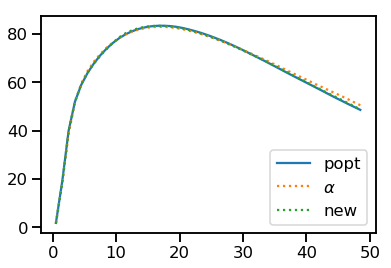

In [291]:
plt.plot(s_c, s_c*s_c*mean_rs.skewt.monopole, label = 'popt')



plt.plot(s_c, s_c*s_c*one_param[idx].monopole, 
             label = parameters[idx], linestyle='dotted'
            )


plt.plot(s_c, s_c*s_c*reduced_skewt.monopole, 
             label = 'new', linestyle='dotted'
            )

plt.legend()

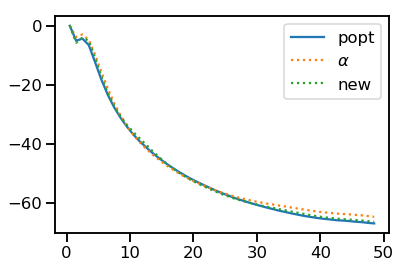

In [292]:
plt.plot(s_c, s_c*s_c*mean_rs.skewt.quadrupole, label = 'popt')



plt.plot(s_c, s_c*s_c*one_param[idx].quadrupole, 
             label = parameters[idx], linestyle='dotted'
            )


plt.plot(s_c, s_c*s_c*reduced_skewt.quadrupole, 
             label = 'new', linestyle='dotted'
            )

plt.legend()

## Improving fit of vr_c

In [378]:
idx = 2
window_size = 15

rolling_test = []
for i in range(len(r)//window_size):
    rolling_test_popt = popt.copy()
    start = i * window_size
    end = (i+1)*window_size
    rolling_test_popt[start:end,idx] = reduced_popt[start:end,idx]
    reduced_skewt = md.Skewt(r, 0.,0.,0., mean_rs.mean_tpcf_dict,
                         popt=rolling_test_popt)
    rolling_test.append(reduced_skewt) 

Computing streaming integral
Computing streaming integral
Computing streaming integral
Computing streaming integral
Computing streaming integral
Computing streaming integral


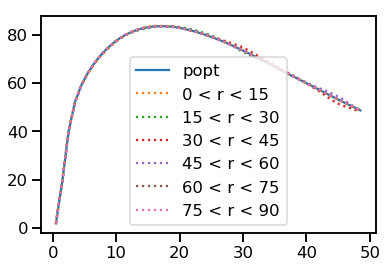

In [380]:
plt.plot(s_c, s_c*s_c*mean_rs.skewt.monopole, label = 'popt')

for i in range(len(rolling_test)):
    start = i *window_size
    end = (i+1) * window_size
    plt.plot(s_c, s_c*s_c*rolling_test[i].monopole, 
             label=f'{start} < r < {end}', linestyle='dotted'
            )

plt.legend()

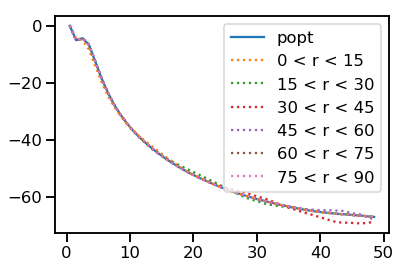

In [379]:
plt.plot(s_c, s_c*s_c*mean_rs.skewt.quadrupole, label = 'popt')

for i in range(len(rolling_test)):
    start = i *window_size
    end = (i+1) * window_size
    plt.plot(s_c, s_c*s_c*rolling_test[i].quadrupole, 
             label=f'{start} < r < {end}', linestyle='dotted'
            )

plt.legend()

In [416]:
def fitting_vrc(r, a,b, c,d):
    return a /r+ b/np.sqrt(r) + c * r + d

0.04005910488114986


(2.0, 2.5)

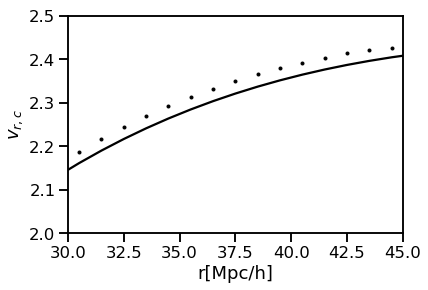

In [417]:
_ ,chi, popt_vrc_halos = param.plot(fitting_vrc, r[:], popt[:,idx], 
        'black', 'Halos',parameters[idx])
#plt.text(40, 0.5, r'$\chi^2_\nu $ = %.2f'%chi, fontdict=dict(color='black'))
plt.xlim(30,45)
plt.ylim(2.,2.5)

0.04005910488114986


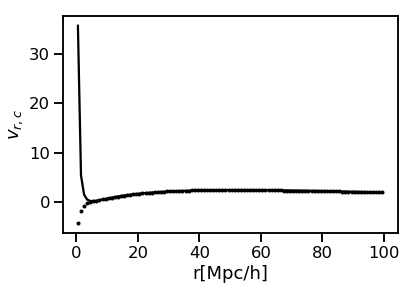

In [418]:
_ ,chi, popt_vrc_halos = param.plot(fitting_vrc, r, popt[:,idx], 
        'black', 'Halos',parameters[idx])
#plt.text(40, 0.5, r'$\chi^2_\nu $ = %.2f'%chi, fontdict=dict(color='black'))


In [369]:
reduced_popt[:,idx] = fitting_vrc(r, *popt_vrc_halos)


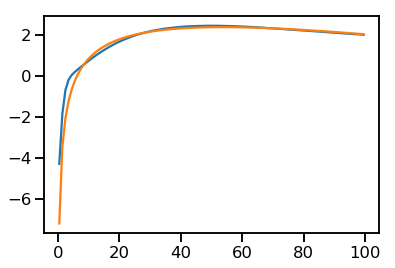

In [370]:
plt.plot(r, popt[:,idx])
plt.plot(r, reduced_popt[:,idx])

In [371]:
one_popt = popt.copy()
one_popt[:,idx] = reduced_popt[:,idx]
reduced_skewt = md.Skewt(r, 0.,0.,0., mean_rs.mean_tpcf_dict,
                     popt=one_popt)

Computing streaming integral


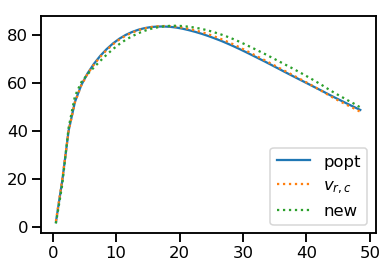

In [372]:
plt.plot(s_c, s_c*s_c*mean_rs.skewt.monopole, label = 'popt')



plt.plot(s_c, s_c*s_c*one_param[idx].monopole, 
             label = parameters[idx], linestyle='dotted'
            )


plt.plot(s_c, s_c*s_c*reduced_skewt.monopole, 
             label = 'new', linestyle='dotted'
            )

plt.legend()

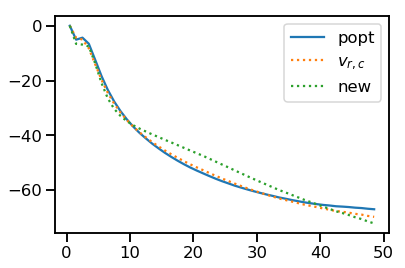

In [373]:
plt.plot(s_c, s_c*s_c*mean_rs.skewt.quadrupole, label = 'popt')



plt.plot(s_c, s_c*s_c*one_param[idx].quadrupole, 
             label = parameters[idx], linestyle='dotted'
            )


plt.plot(s_c, s_c*s_c*reduced_skewt.quadrupole, 
             label = 'new', linestyle='dotted'
            )

plt.legend()